In [1]:
# Q1. Load the dataset, airfoil_self_noise.DAT, into memory. (Hint: This file is tab separated)
import pandas as pd
columns = ["Frequency (in Hertzs)", "Angle of Attack (in degrees)", "Chord Length (in meters)", 
           "Free-Stream Velocity (in meters per second)", "Suction Side Displacement Thickenss (in meters)", 
           "Sacled Sound Pressure Level (in decibles)"]
df = pd.read_csv('airfoil_self_noise.dat', sep = '\t', names=columns)
df.head()

,Frequency (in Hertzs),Angle of Attack (in degrees),Chord Length (in meters),Free-Stream Velocity (in meters per second),Suction Side Displacement Thickenss (in meters),Sacled Sound Pressure Level (in decibles)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [2]:
# Q2. Clean the data and check missing values for this dataset.
df.dtypes

Frequency (in Hertzs)                                int64
Angle of Attack (in degrees)                       float64
Chord Length (in meters)                           float64
Free-Stream Velocity (in meters per second)        float64
Suction Side Displacement Thickenss (in meters)    float64
Sacled Sound Pressure Level (in decibles)          float64
dtype: object

In [3]:
df.isnull().sum(axis=0)

Frequency (in Hertzs)                              0
Angle of Attack (in degrees)                       0
Chord Length (in meters)                           0
Free-Stream Velocity (in meters per second)        0
Suction Side Displacement Thickenss (in meters)    0
Sacled Sound Pressure Level (in decibles)          0
dtype: int64

In [4]:
df.describe()

,Frequency (in Hertzs),Angle of Attack (in degrees),Chord Length (in meters),Free-Stream Velocity (in meters per second),Suction Side Displacement Thickenss (in meters),Sacled Sound Pressure Level (in decibles)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


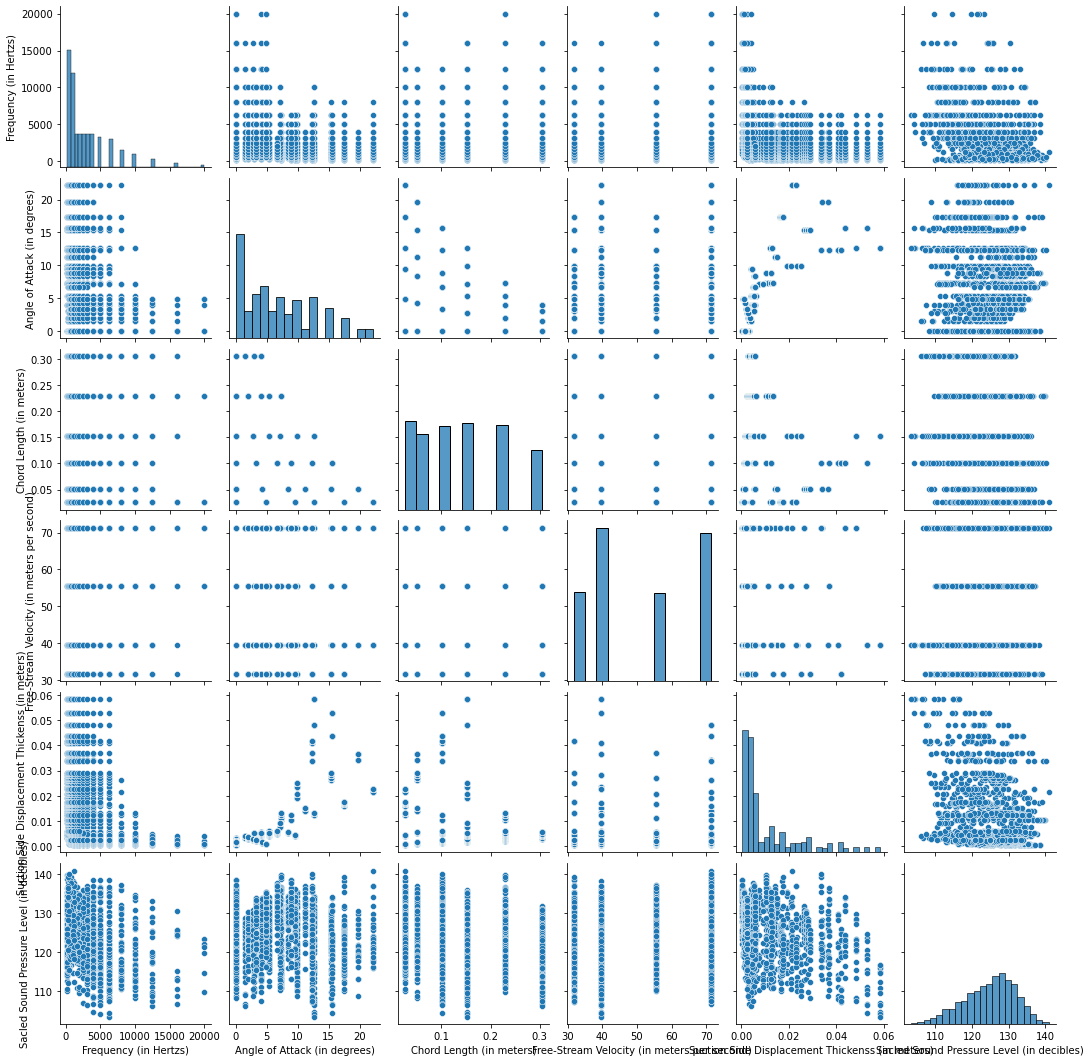

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
# Q3. Split the data into 80% of training and 20% of test dataset.
X = df.drop('Sacled Sound Pressure Level (in decibles)', axis=1)
y = df['Sacled Sound Pressure Level (in decibles)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021)

In [7]:
# Q4. Build a simple linear regression to forecast "Scaled sound pressure level" using all other features and scikit-learn
# package. What's the test error for this scikit-learn regression model?
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
'The test error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The test error is 25.0018'

In [8]:
# Q5. Preprocess the data using the normalization method to convert all features into the range of [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Q6. Build a deep learning regression model to forecast "Scaled sound pressure level" using all other features and TensorFlow.
# Please use only two layers of neuron network. You choose the number of neurons to use in the first layer. What's the test
# error for this model?
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

model.fit(x=X_train, y=y_train, batch_size=64, epochs=100, validation_data=(X_test,y_test))

y_pred = model.predict(X_test)
'The test error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 15655.7900 - val_loss: 15549.3359
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 15640.4160 - val_loss: 15533.4482
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 15623.1084 - val_loss: 15515.0996
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 15603.1367 - val_loss: 15493.0801
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 15578.5986 - val_loss: 15466.3740
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 15548.3359 - val_loss: 15433.3076
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 15511.3760 - val_loss: 15393.3818
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 15467.0967 - val_loss: 15346.9189
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 15416.6377 - val_loss: 15294.5645
Epoch 10/100
19/19 [================

19/19 [==============================] - 0s 3ms/step - loss: 6036.7100 - val_loss: 5933.2402
Epoch 78/100
19/19 [==============================] - 0s 4ms/step - loss: 5894.6108 - val_loss: 5793.5381
Epoch 79/100
19/19 [==============================] - 0s 4ms/step - loss: 5754.5151 - val_loss: 5655.5464
Epoch 80/100
19/19 [==============================] - 0s 4ms/step - loss: 5616.1880 - val_loss: 5519.4219
Epoch 81/100
19/19 [==============================] - 0s 4ms/step - loss: 5479.6533 - val_loss: 5385.5000
Epoch 82/100
19/19 [==============================] - 0s 4ms/step - loss: 5345.2939 - val_loss: 5253.3364
Epoch 83/100
19/19 [==============================] - 0s 4ms/step - loss: 5212.8301 - val_loss: 5123.1016
Epoch 84/100
19/19 [==============================] - 0s 4ms/step - loss: 5082.4570 - val_loss: 4994.8677
Epoch 85/100
19/19 [==============================] - 0s 4ms/step - loss: 4953.8608 - val_loss: 4869.1626
Epoch 86/100
19/19 [==============================] - 0s 4m

'The test error is 3248.2174'

In [10]:
# Q7. Can you improve the model performance of Q6 by adjusting the number of neurons or the optimization algorithm?

model = keras.Sequential()
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=5, epochs=200, validation_data=(X_test,y_test))

y_pred = model.predict(X_test)
'The test error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

# 25 neurons, a batch size of 5, 200 epochs, and the adam algorithm consistently produced the lowest test error.

Epoch 1/200
241/241 [==============================] - 1s 3ms/step - loss: 15093.7188 - val_loss: 14090.7324
Epoch 2/200
241/241 [==============================] - 1s 2ms/step - loss: 12665.8008 - val_loss: 10764.5303
Epoch 3/200
241/241 [==============================] - 1s 2ms/step - loss: 8743.9443 - val_loss: 6551.7188
Epoch 4/200
241/241 [==============================] - 1s 2ms/step - loss: 4840.1377 - val_loss: 3288.8853
Epoch 5/200
241/241 [==============================] - 1s 2ms/step - loss: 2343.1106 - val_loss: 1634.2955
Epoch 6/200
241/241 [==============================] - 1s 2ms/step - loss: 1274.7784 - val_loss: 1089.2194
Epoch 7/200
241/241 [==============================] - 1s 2ms/step - loss: 964.5687 - val_loss: 952.1408
Epoch 8/200
241/241 [==============================] - 1s 2ms/step - loss: 867.8856 - val_loss: 886.6639
Epoch 9/200
241/241 [==============================] - 1s 2ms/step - loss: 809.7544 - val_loss: 827.2667
Epoch 10/200
241/241 [=================

241/241 [==============================] - 1s 2ms/step - loss: 22.9302 - val_loss: 24.9652
Epoch 80/200
241/241 [==============================] - 1s 2ms/step - loss: 22.8254 - val_loss: 25.3141
Epoch 81/200
241/241 [==============================] - 1s 2ms/step - loss: 22.9815 - val_loss: 25.1078
Epoch 82/200
241/241 [==============================] - 1s 2ms/step - loss: 22.9339 - val_loss: 24.9883
Epoch 83/200
241/241 [==============================] - 1s 2ms/step - loss: 22.7747 - val_loss: 25.5400
Epoch 84/200
241/241 [==============================] - 1s 2ms/step - loss: 23.0745 - val_loss: 25.0963
Epoch 85/200
241/241 [==============================] - 1s 2ms/step - loss: 22.9065 - val_loss: 25.0046
Epoch 86/200
241/241 [==============================] - 0s 2ms/step - loss: 22.9870 - val_loss: 25.0410
Epoch 87/200
241/241 [==============================] - 0s 1ms/step - loss: 22.8115 - val_loss: 25.1443
Epoch 88/200
241/241 [==============================] - 0s 2ms/step - loss: 2

241/241 [==============================] - 0s 1ms/step - loss: 22.7744 - val_loss: 25.0389
Epoch 158/200
241/241 [==============================] - 0s 2ms/step - loss: 22.7719 - val_loss: 25.1958
Epoch 159/200
241/241 [==============================] - 1s 2ms/step - loss: 22.8781 - val_loss: 25.0752
Epoch 160/200
241/241 [==============================] - 1s 2ms/step - loss: 22.8321 - val_loss: 25.0466
Epoch 161/200
241/241 [==============================] - 1s 2ms/step - loss: 22.7399 - val_loss: 25.6116
Epoch 162/200
241/241 [==============================] - 0s 2ms/step - loss: 22.8945 - val_loss: 25.0833
Epoch 163/200
241/241 [==============================] - 1s 2ms/step - loss: 22.7662 - val_loss: 25.4044
Epoch 164/200
241/241 [==============================] - 0s 2ms/step - loss: 22.8753 - val_loss: 25.1504
Epoch 165/200
241/241 [==============================] - 1s 2ms/step - loss: 22.7625 - val_loss: 25.6942
Epoch 166/200
241/241 [==============================] - 1s 2ms/step 

'The test error is 25.0910'